# **Telco Customer Churn - Exploratory Data Analysis (EDA)**

![Telco Churn Analysis](CustomerChurn.jpg)


# **Introduction**
The primary objective of this Exploratory Data Analysis (EDA) is to understand customer churn patterns and identify key factors influencing churn. By analyzing the dataset, we aim to determine the most significant variables affecting churn, which can later be utilized for:

- **Forecasting & Trend Analysis:** Anticipating customer behavior by identifying churn patterns and trends.
- **Customer Retention Strategies:** Developing targeted actions to minimize churn based on key influencing factors.
- **Company Policy Improvements:** Providing insights for business decisions, such as optimizing pricing models, reducing unexpected fees, and refining contract offerings.

# **Dataset description**

### **Content**

Each row represents a customer, each column contains customer’s attributes.

### **The data set includes information about:**

- Customers who left within the last month – the column is called Churn.
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## **1. Import Libraries & Load Data**

In [81]:
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

### **Load dataset**

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

### **Display first & few rows**

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## **2. Data Overview & Cleaning**
### **Check data types, missing values, and summary statistics**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df["SeniorCitizen"].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

### **Insights:**
SeniorCitizen seems to contain in reality boolean values. Which means the Data doesn't represent a real numerical value.

### **Convert 'SeniorCitizen' to categorical values**

In [15]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "False", 1: "True"})

### **Insights:**
It seems TotalCharges' data is currently set as object when it should contain numberical values.

### **Convert 'TotalCharges' to numeric (handling spaces)**

### **Insights:**
When trying to convert I got an error indicating there were some empty string values.

In [17]:
(df["TotalCharges"] == " ").sum()

np.int64(11)

In [18]:
df[df["TotalCharges"] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,False,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,False,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,False,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### **Convert empty strings in 'TotalCharges' to NaN**

In [20]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", pd.NA)

### **Convert 'TotalCharges' to numeric**

In [22]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

### **Handling the NAN**

### **Insights:**
After checking the data available on the other columns where the NAN are present in Total Charges I can see that there is valuable information that I dont want to lose for further analysis later on. Which is why i'm rulling out droping the NAN in this case. 
I would like to better understand the type of info the Total Charges contains to see the best way to handle those NAN.

### **Understanding Total Charges**
I'm creating a new column with the expected total charges based on tenure and monthly charges. Then, checking for any discrepancies with the actual Total Charges. Finally, visualising all three for a better comparison. 

In [25]:
df["ExpectedTotalCharges"] = df["MonthlyCharges"] * df["tenure"]
df["ChargeDifference"] = df["TotalCharges"] - df["ExpectedTotalCharges"]
print(df[["TotalCharges", "ExpectedTotalCharges", "ChargeDifference"]].head(10))

   TotalCharges  ExpectedTotalCharges  ChargeDifference
0         29.85                 29.85              0.00
1       1889.50               1936.30            -46.80
2        108.15                107.70              0.45
3       1840.75               1903.50            -62.75
4        151.65                141.40             10.25
5        820.50                797.20             23.30
6       1949.40               1960.20            -10.80
7        301.90                297.50              4.40
8       3046.05               2934.40            111.65
9       3487.95               3481.30              6.65


### **Insights:**

It seems in some cases there is no difference or the difference is very small. But for now i'm just checking a small sample of the data which doesnt allow me to draw conclusions from it. There could be bigger differences or outliers that I would like to investigate further.

### **Finding Outliers in Charge Difference**

In [26]:
df["ChargeDifference"].describe()

count    7032.000000
mean        0.153193
std        67.255326
min      -370.850000
25%       -28.650000
50%         0.000000
75%        28.700000
max       373.250000
Name: ChargeDifference, dtype: float64

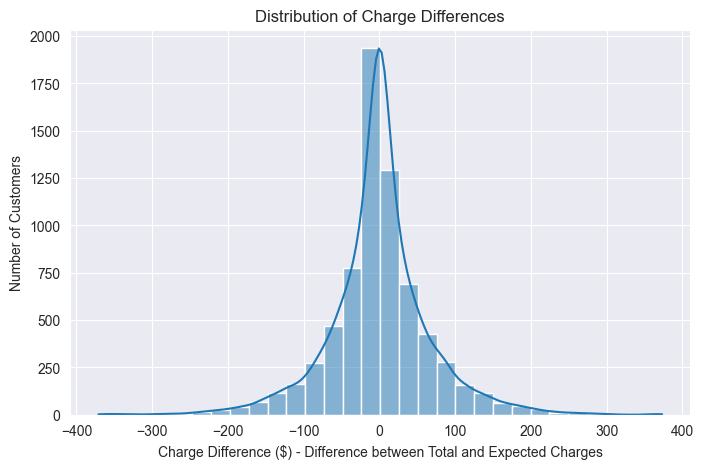

In [91]:
plt.figure(figsize=(8, 5))
sns.histplot(df["ChargeDifference"], bins=30, kde=True)
plt.title("Distribution of Charge Differences")
plt.xlabel("Charge Difference ($) - Difference between Total and Expected Charges")
plt.ylabel("Number of Customers")
plt.show()

### **Insights:**

I can see that the mean is very close to 0 ($0.15), but the standard deviation is large ($67.25). Which suggest that some customers have significantly higher or lower total charges than expected.

I can observe some negative values (min = -$370.85) which means that for some customers TotalCharges is less than expected. Possible reasons could be due to discounts or refunds. 

On the other hand, positive values (max = $373.25) indicate that some customers paid more than expected, which could be due to extra fees or one-time purchases (e.g., equipment)

Another important remark is regarding the median (Q2), where the charge difference is $0, meaning half of the customers paid exactly what was expected.

All in all, I can conclude that most customers pay close to expected, but some outliers paid significantly more or less.

### **Exploring the relation between Charge Difference & Contract Type**

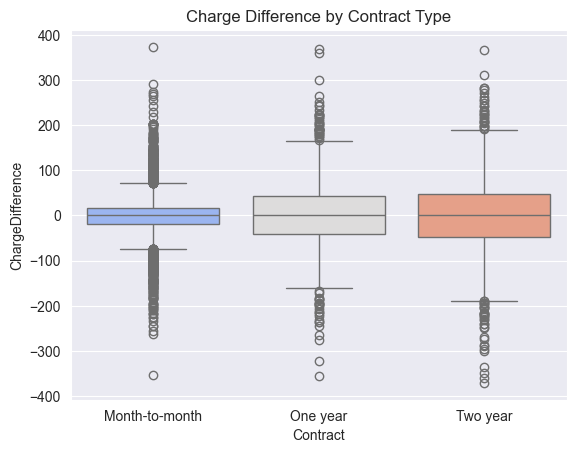

In [83]:
sns.boxplot(data=df, x="Contract", y="ChargeDifference", hue="Contract", palette="coolwarm")
plt.title("Charge Difference by Contract Type")
plt.show()


### **Insights:**

All three contract types have a median of $0, which means that, on average, customers across all contract types are paying close to what was expected
Most month-to-month customers have charge differences close to 0, meaning their billing is more consistent compared to the other contract types.
The fact that outliers appear for all contract types suggests that extra charges or discounts are not specific to one contract type.

### **Overall conclusion for Total Charges and NAN handling**

TotalCharges is mostly predictable (median ≈ 0), but with some irregularities. So, I consider that imputing NAN TotalCharges using ExpectedTotalCharges is a reasonable approach, especially considering the total amount of customers with NAN is only 11. 

In [54]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["ExpectedTotalCharges"])

### **Checking if any other column has empty strings**

In [34]:
(df == " ").sum()

customerID              0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
Churn                   0
ExpectedTotalCharges    0
ChargeDifference        0
dtype: int64

### **Checking Missing values per column**

In [35]:
df.isnull().sum()

customerID               0
gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
tenure                   0
PhoneService             0
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
MonthlyCharges           0
TotalCharges             0
Churn                    0
ExpectedTotalCharges     0
ChargeDifference        11
dtype: int64

### **Checking Duplicate rows**

In [36]:
df.duplicated().sum()

np.int64(0)

### **Remove 'customerID' column (not useful for analysis)**

In [37]:
df.drop(columns=["customerID"], inplace=True)

## **3. Understanding Churn**

In this section the aim to understand customer churn, which is the target variable of this EDA, its distribution and any possible variable that could have a relation with it. 

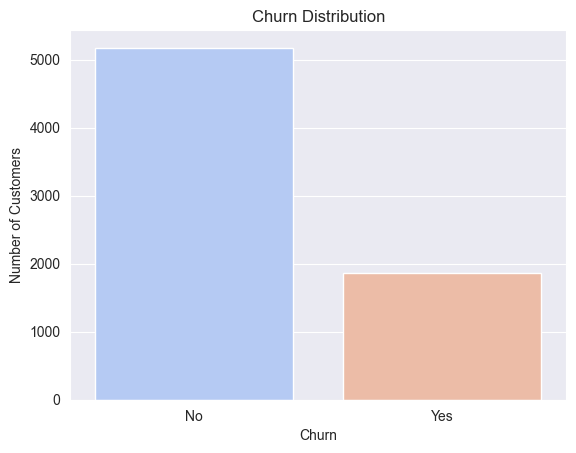

In [84]:
sns.countplot(data=df, x="Churn", hue="Churn", palette="coolwarm")
plt.ylabel("Number of Customers")
plt.title("Churn Distribution")
plt.show()


In [44]:
total_customers = df.shape[0]  
churned_customers = df[df["Churn"] == "Yes"].shape[0]  
print(f"Total customers: {total_customers}")
print(f"Churned customers: {churned_customers}")
print(f"Percentage of churned customers: {churned_customers / total_customers * 100:.2f}%")


Total customers: 7043
Churned customers: 1869
Percentage of churned customers: 26.54%


### **Insights:**

It is alarming to see that 26.54% of the customers churned over the last month. I would like to better understand any patterns or relations that other categorical & numerical variables could have over churned customers or over the customers that are still active.

### **Exploring Numerical Variables**

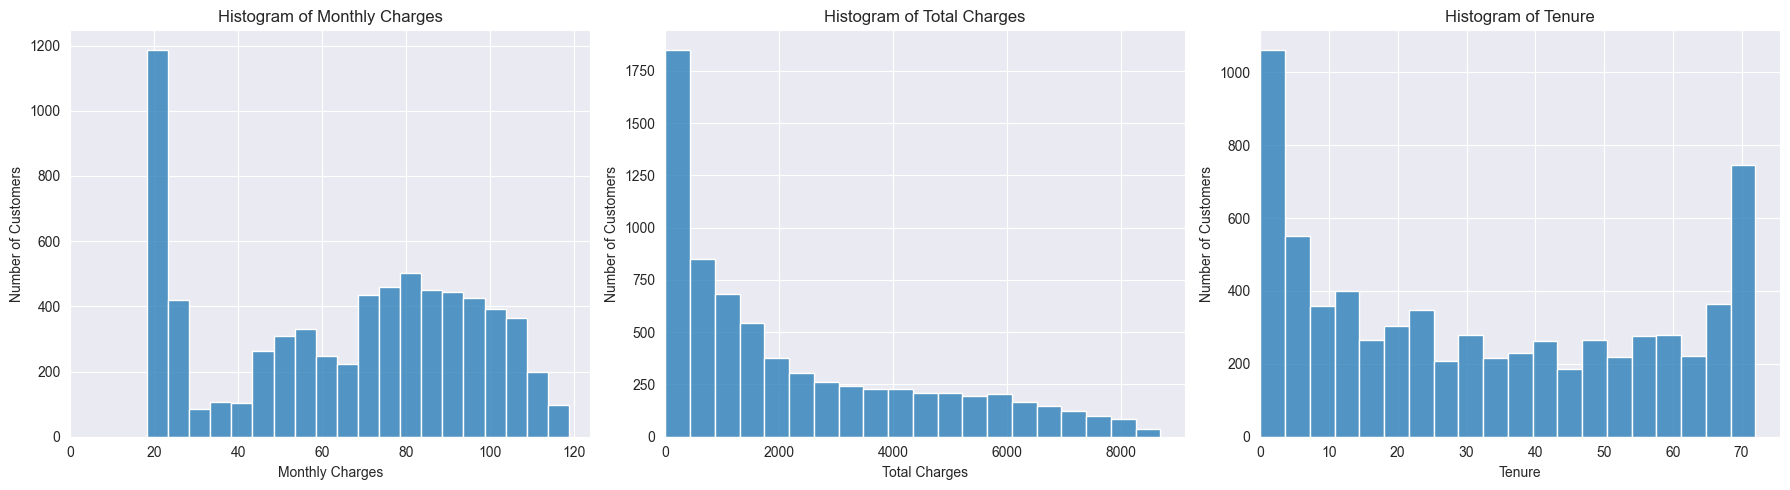

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5)) 

sns.histplot(data=df, x="MonthlyCharges", bins=20, ax=axes[0])
axes[0].set_title("Histogram of Monthly Charges")
axes[0].set_xlabel("Monthly Charges")
axes[0].set_ylabel("Number of Customers")
axes[0].grid(True)
axes[0].set_xlim(left=0)

sns.histplot(data=df, x="TotalCharges", bins=20, ax=axes[1])
axes[1].set_title("Histogram of Total Charges")
axes[1].set_xlabel("Total Charges")
axes[1].set_ylabel("Number of Customers")
axes[1].grid(True)
axes[1].set_xlim(left=0)

sns.histplot(data=df, x='tenure', bins=20, ax=axes[2])
axes[2].set_title('Histogram of Tenure')
axes[2].set_xlabel('Tenure')
axes[2].set_ylabel('Number of Customers')
axes[2].grid(True)
axes[2].set_xlim(left=0)

titles = ['Tenure', 'Monthly Charges', 'Total Charges']

plt.tight_layout()
plt.show()


In [78]:
df[df['TotalCharges'] == 0]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ExpectedTotalCharges,ChargeDifference
488,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No,0.0,NaN
753,Male,False,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No,0.0,NaN
936,Female,False,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No,0.0,NaN
1082,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No,0.0,NaN
1340,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No,0.0,NaN
3331,Male,False,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No,0.0,NaN
3826,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No,0.0,NaN
4380,Female,False,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No,0.0,NaN
5218,Male,False,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No,0.0,NaN
6670,Female,False,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,No,Two year,No,Mailed check,73.35,0.0,No,0.0,NaN


In [94]:
df[df['TotalCharges'] == 0]['TotalCharges'].count()

np.int64(11)

In [79]:
df[df['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ExpectedTotalCharges,ChargeDifference
488,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No,0.0,NaN
753,Male,False,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No,0.0,NaN
936,Female,False,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No,0.0,NaN
1082,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No,0.0,NaN
1340,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No,0.0,NaN
3331,Male,False,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No,0.0,NaN
3826,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No,0.0,NaN
4380,Female,False,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No,0.0,NaN
5218,Male,False,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No,0.0,NaN
6670,Female,False,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,No,Two year,No,Mailed check,73.35,0.0,No,0.0,NaN


### **Insights:**

It has been found that there are 11 customers both with zero Tenure and zero TotalCharges, with positive MonthlyCharges, and none of them have churned. This probably could mean that they recently joined but haven't completed their first month, and therefore have not yet been billed. Or given that 10 out 11 are on a two year contract, could be they were offered the first month for free as part of some discount bundle. Still, given that there are only 11 customers I wont consider them as part of any important influential factor over Churn.

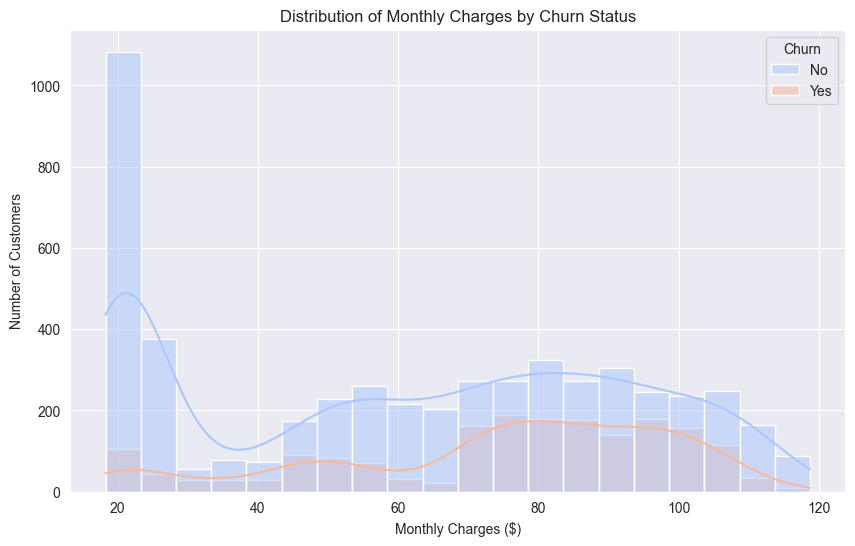

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", bins=20, kde=True, palette="coolwarm")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Monthly Charges by Churn Status")
plt.show()

### **Insights:**

It has been observed that the highest churn occurs among customers paying between $70 and $110 per month, with approximately 180-200 churned customers in this range.
However, a larger number of non-churned customers (250-300) also fall within this price range, suggesting that higher Monthly Charges alone may not be the main driver of churn. To better understand what influences churn beyond Monthly Charges, further analysis will be conducted. 

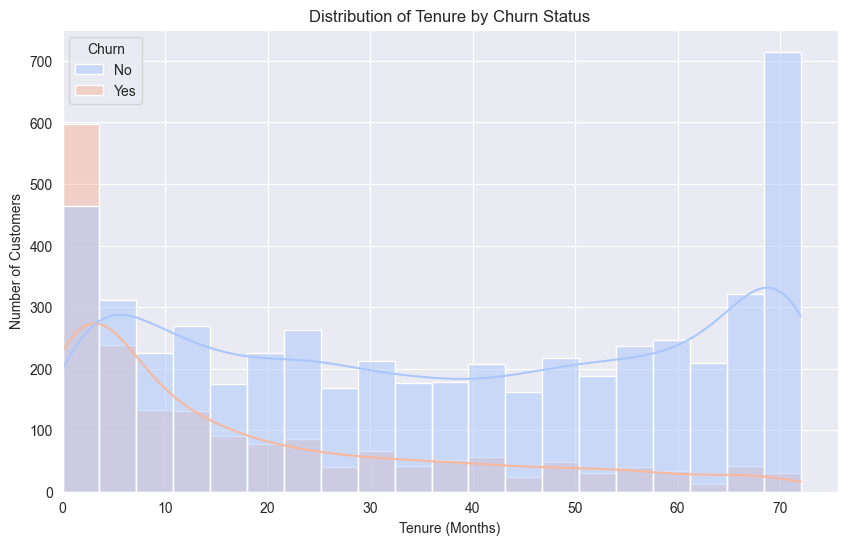

In [111]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="tenure", hue="Churn", bins=20, kde=True, palette="coolwarm")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Tenure by Churn Status")
plt.xlim(left=0) 
plt.show()

### **Insights:**

It can be seen that customers with the longest tenure (around 70 months) are the least likely to churn, with approximately 700 retained customers.
The highest churn occurs among short-tenure customers (0-3 months), with around 600 churning, indicating that new customers are most at risk of leaving.
Churn rate progressively decreases as tenure increases, suggesting that customers who stay longer are more likely to remain loyal. It can be concluded that probably most of the efforts to reduce churn need to happen during the first months of tenure, which is why I will now focus on further investigating patterns over that segment of early churners to see if any pattern can be identified.

### **Exploring Categorical Variables**

In [115]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: ['False' 'True']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


### **Insights:**

From the cateforical variables I would like to further explore Contract, given its influcence on tenure; PaymentMethod, given its direct relation with revenue, and TechSupport to explore if any technical problem could be impacting Churn.

In [123]:
early_churners = df[(df["tenure"] <= 3) & (df["Churn"] == "Yes")]
total_early_churners = early_churners.shape[0]
print("Customers who churned within the first 3 months:\n", total_early_churners)

contract_counts = early_churners["Contract"].value_counts()
print("Contract Type Distribution for Early Churners:\n", contract_counts)

payment_counts = early_churners["PaymentMethod"].value_counts()
print("\nPayment Method Distribution for Early Churners:\n", payment_counts)

tech_support_counts = early_churners["TechSupport"].value_counts()
print("\nTech Support Contact Distribution for Early Churners:\n", tech_support_counts)


Customers who churned within the first 3 months:
 597
Contract Type Distribution for Early Churners:
 Contract
Month-to-month    595
One year            2
Name: count, dtype: int64

Payment Method Distribution for Early Churners:
 PaymentMethod
Electronic check             350
Mailed check                 172
Bank transfer (automatic)     38
Credit card (automatic)       37
Name: count, dtype: int64

Tech Support Contact Distribution for Early Churners:
 TechSupport
No                     488
No internet service     70
Yes                     39
Name: count, dtype: int64


### **Insights:**

The most significant insight regarding early churners, who represent the largest segment of churn, is that 99% were on month-to-month contracts. This suggests that customers with flexible, short-term contracts are at a significantly higher risk of churning.

Additionally, 87% of early churners used Electronic Check or Mailed Check as their payment method. This indicates that automatic payment methods such as bank transfers or credit cards may be linked to greater customer retention stability.

Another key finding is that 81% of these customers never contacted Technical Support, suggesting that churn in this segment is unlikely to be driven by technical issues. 

To further investigate potential drivers of churn, billing method (paperless vs. paper) has been selected for additional analysis to determine whether it has any significant correlation with customer retention.

In [125]:
paperless_counts = early_churners["PaperlessBilling"].value_counts()
print("\nPaperless Billing Distribution for Early Churners:\n", paperless_counts)

high_tenure_customers = df[(df["tenure"] >= 68) & (df["tenure"] <= 72) & (df["Churn"] == "No")]
paperless_counts_high_tenure = high_tenure_customers["PaperlessBilling"].value_counts()
print("Paperless Billing Distribution for Non-Churned Customers with High Tenure:\n", paperless_counts_high_tenure)



Paperless Billing Distribution for Early Churners:
 PaperlessBilling
Yes    412
No     185
Name: count, dtype: int64
Paperless Billing Distribution for Non-Churned Customers with High Tenure:
 PaperlessBilling
Yes    458
No     348
Name: count, dtype: int64


### **Insights:**

The analysis of paperless billing vs. churn suggests that paperless billing is not a major driver of churn. Among early churners, 412 customers (69%) had paperless billing, while 185 (31%) did not. However, a similar trend is observed among long-tenure, non-churned customers, where 458 (57%) used paperless billing, and 348 (43%) did not.

Since a significant number of both churned and retained customers use paperless billing, it does not appear to have a strong correlation with churn

## **4. Conslusion**

This exploratory data analysis (EDA) of customer churn in the Telco dataset has revealed key insights into customer behavior and factors influencing retention.

1. **Early Churners Are Primarily Month-to-Month Customers:** The largest segment of churned customers had month-to-month contracts (99%), indicating that contract flexibility is strongly associated with higher churn rates. Customers on one-year and two-year contracts had significantly lower churn rates, suggesting that longer contract commitments help retain customers.
2. **Payment Method May Influence Churn:** 87% of early churners used Electronic Check or Mailed Check, while automatic payment methods (credit card and bank transfer) were more common among retained customers. This suggests that automatic payments may contribute to customer stability and retention.
3. **Churn Decreases as Tenure Increases:** Customers with the shortest tenure (0-3 months) had the highest churn rate (600 customers), while customers with longer tenure (70+ months) were the most stable. This indicates that the first few months are critical in customer retention, and businesses should focus on improving the onboarding experience and customer engagement.
4. **Paperless Billing Does Not Have a Strong Impact on Churn:** Both churned and non-churned customers had similar proportions of paperless billing users. Since paperless billing was common in both groups, it is unlikely to be a key factor in churn.

### **Final Thoughts**

The analysis suggests that contract type, payment method, and customer tenure play a crucial role in churn behavior, while paperless billing does not have a significant impact.

Future steps could involve targeted retention strategies, such as offering incentives for long-term contracts, improving customer engagement within the first few months and encouraging automatic payment methods to enhance retention stability.